              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
(13320, 9)

 Data Cleaning

 View All Columns
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

 Drop Unnecessary Columns

 Check for Missing Values
loca

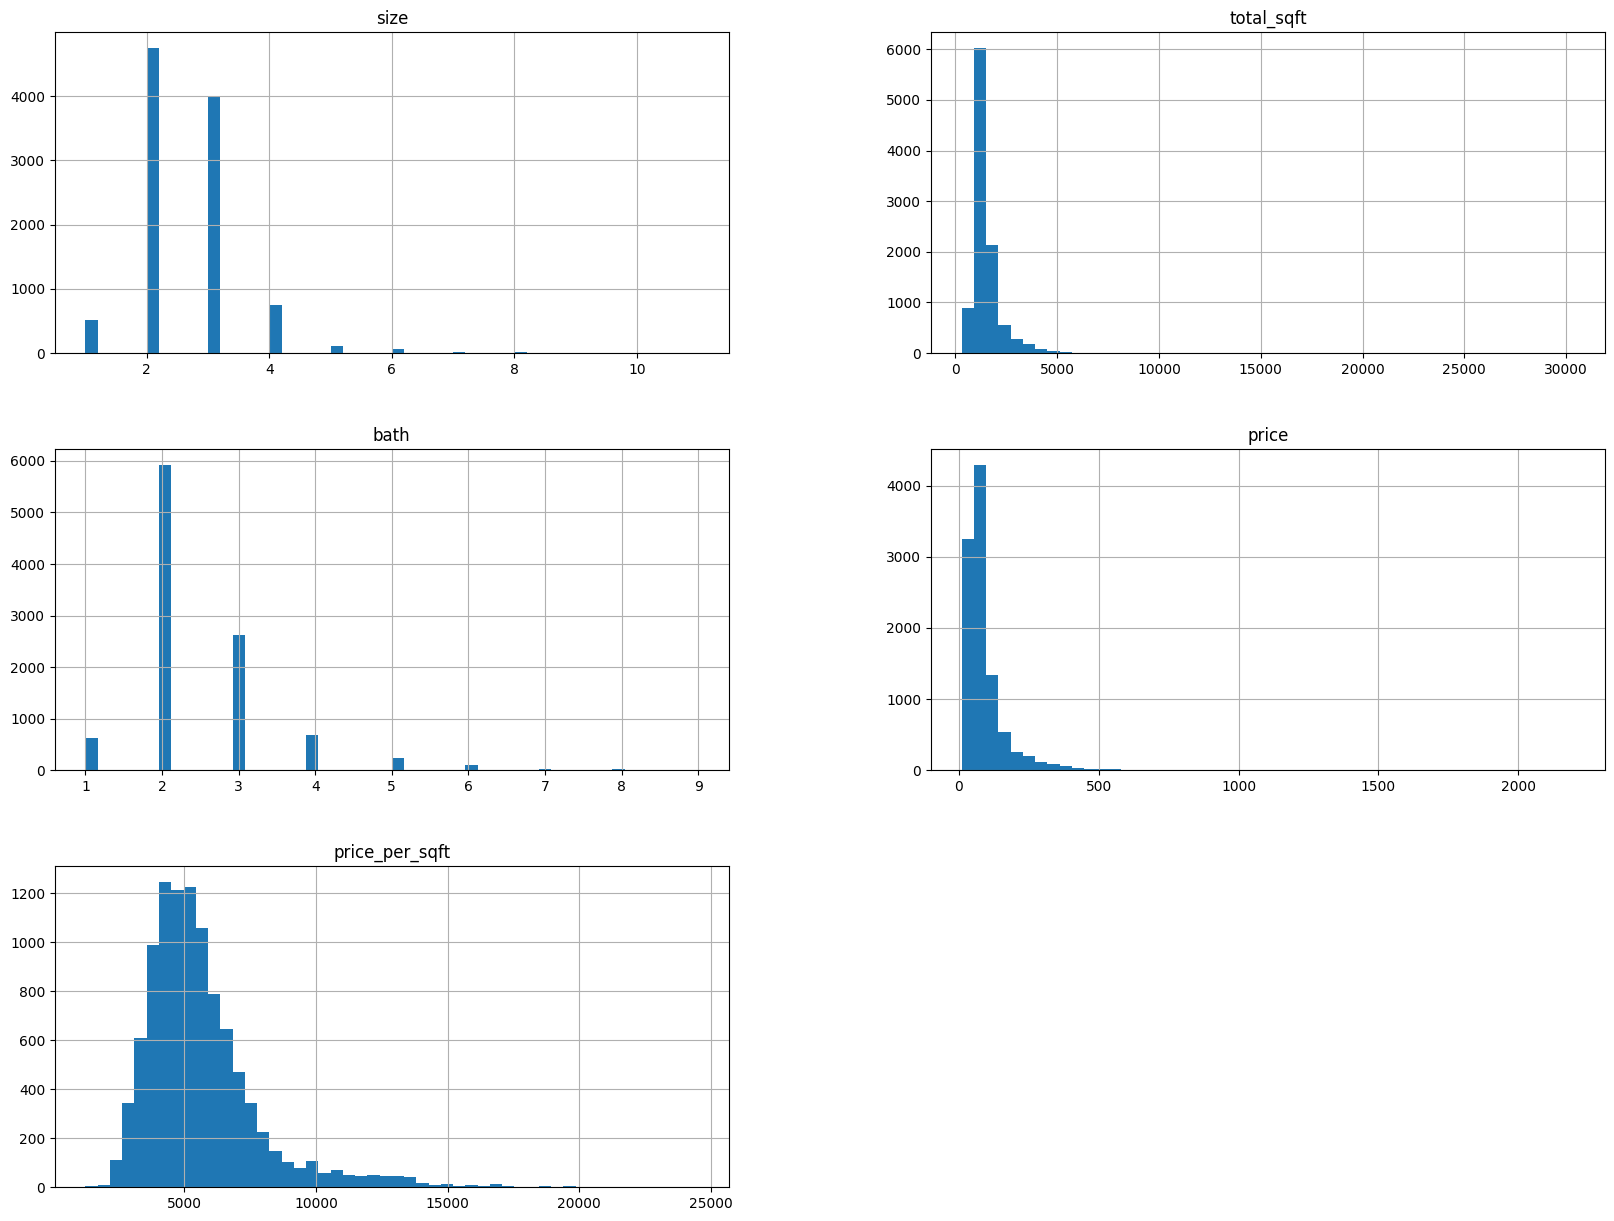

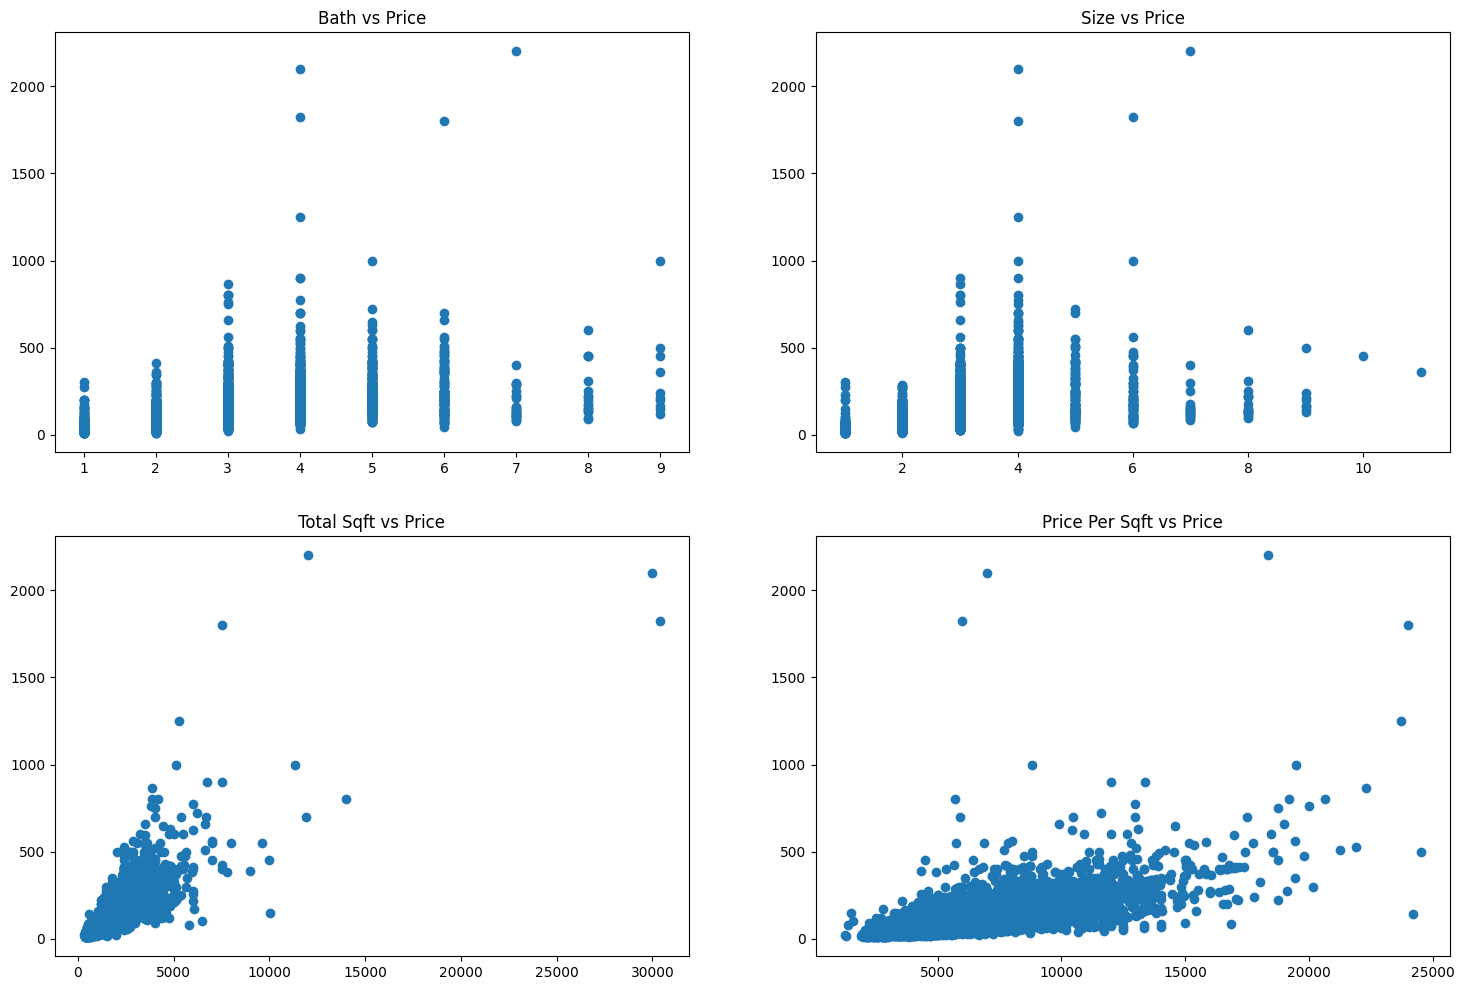

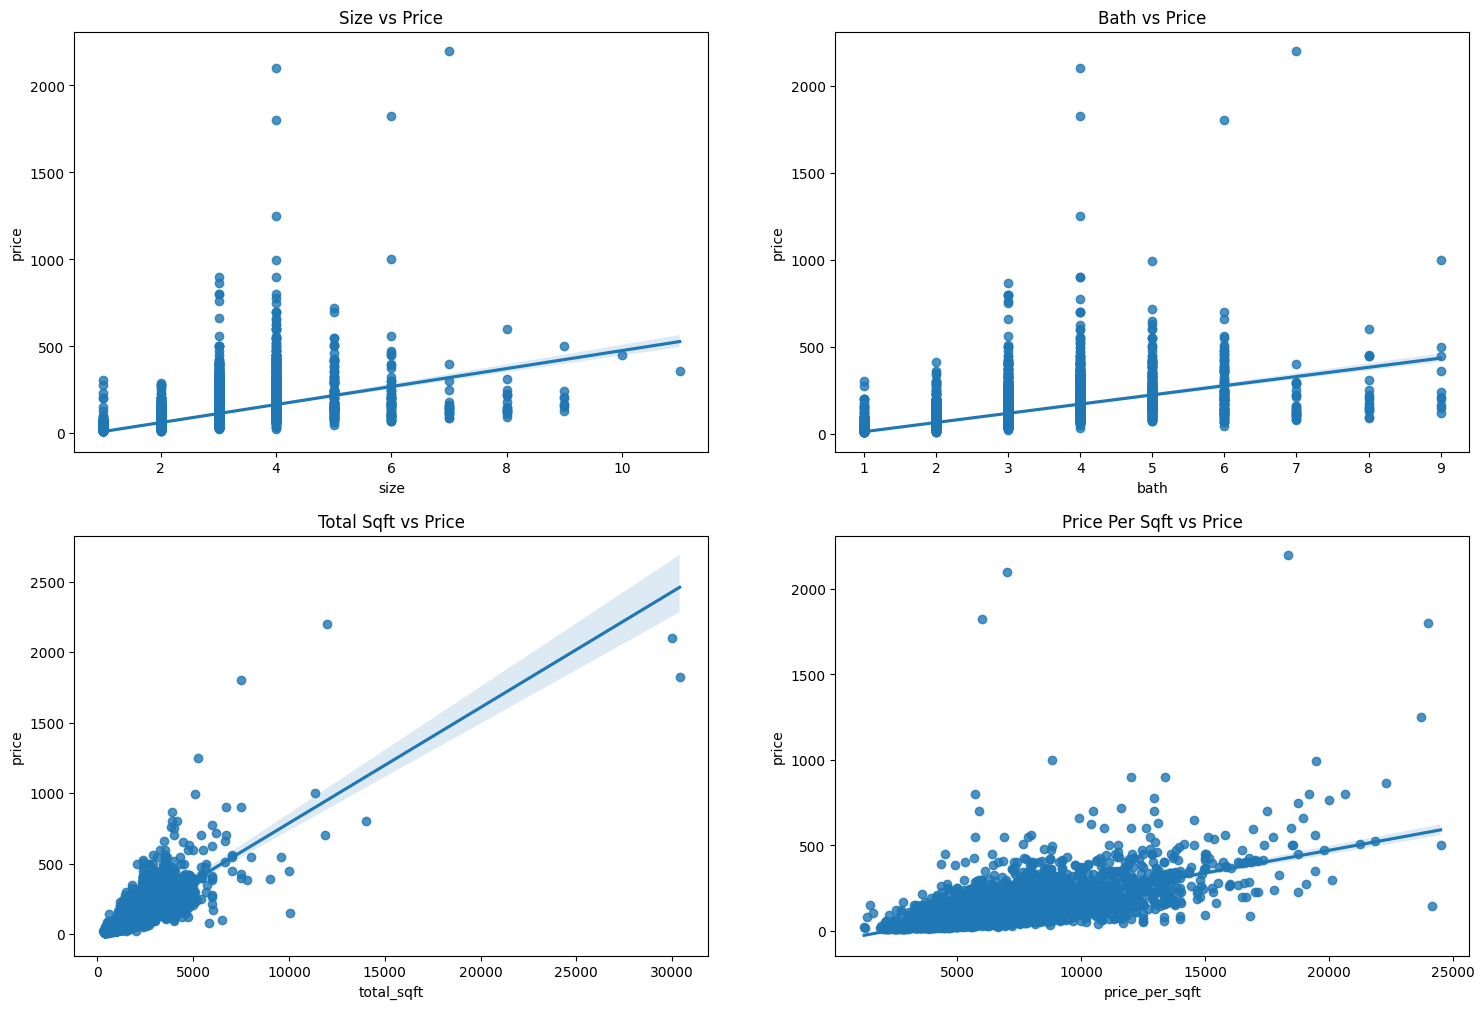

              location  size  total_sqft  bath  price  price_per_sqft
0  1st Block Jayanagar   4.0      2850.0   4.0  428.0    15017.543860
1  1st Block Jayanagar   3.0      1630.0   3.0  194.0    11901.840491
2  1st Block Jayanagar   3.0      1875.0   2.0  235.0    12533.333333
3  1st Block Jayanagar   3.0      1200.0   2.0  130.0    10833.333333
4  1st Block Jayanagar   2.0      1235.0   2.0  148.0    11983.805668

 Training data size =  (7680, 4)
Test data size =  (2561, 4)

 Statistical Description
           location          size    total_sqft          bath         price  \
count  10241.000000  10241.000000  10241.000000  10241.000000  10241.000000   
mean     155.875012      2.568109   1501.169193      2.469485     90.886476   
std       77.655957      0.871351    864.259711      0.953751     85.913990   
min        0.000000      1.000000    300.000000      1.000000     10.000000   
25%       93.000000      2.000000   1108.000000      2.000000     49.000000   
50%      169.00000

' rooms = int(input("Enter number of rooms: "))\nbath = int(input("Enter number of bathrooms: "))\nacre_lot = float(input("Enter acre lot: "))\nhouse_size = float(input("Enter house size: "))\n\n# New  description  \nprint("Predict Price of Apartment")\n\n#Prepare 2D List data structure    \nprediction_inputs = []\nprediction_inputs.append([rooms, bath, acre_lot, house_size])\n\nprint(\'\n Structured input description: \', prediction_inputs)   \nhandle.predict_new_instance(prediction_inputs)   '

In [41]:
"""
Created on Tue 09 March, 2024

@author: Gideon Assafuah

Radom Forest Regressor Model
"""

#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import r2_score

# Instantiate the label encoder
label_encoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  
    
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    print("\n Test:", df.groupby('location'))
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

class RF_Regression:
    
    def load_Data(self, filepath): 
        df = pd.read_csv(filepath)
        
        self.df = df
        
        print(df.head())
        
        print(df.shape)

    def clean_data(self):
        print('\n Data Cleaning')
        df = self.df

        print('\n View All Columns')
        print(df.columns)

        print('\n Drop Unnecessary Columns')
        df = df.drop(['area_type','society','balcony','availability'],axis='columns')

        print('\n Check for Missing Values')
        print(df.isnull().sum())
        print(df.shape)

        # convert size to string and remove the text
        df['size'] = df['size'].astype(str)
        df['size'] = df['size'].apply(lambda x: x.split(' ')[0])


        # Explore total_sqft feature
        print(df[~df['total_sqft'].apply(is_float)].head(10))

        df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
        df = df[df.total_sqft.notnull()]

        # check new total_sqft values
        print("Check new total_sqft values")    
        print(df.head(2))
        
        # Add price per unit
        df['price_per_sqft'] = df['price']*100000/df['total_sqft']

        df['location'] = df['location'].astype(str)
        df['location'] = df['location'].apply(lambda x: x.strip())
        location_stats = df['location'].value_counts(ascending=False)
        print(location_stats)

        print(location_stats.values.sum())

        print(len(location_stats[location_stats>10]))

        print(len(location_stats))

        print(len(location_stats[location_stats<=10]))

        location_stats_less_than_10 = location_stats[location_stats<=10]

        print(location_stats_less_than_10)

        print(len(df.location.unique()))

        df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

        print(len(df.location.unique()))

        print("\n Table with location")
        print(df.head(10))

        # Removing outliers
        
        # convert size and total_sqft to float
        df['size'] = df['size'].astype(float)
        df['total_sqft'] = df['total_sqft'].astype(float)

        # square feet per bedroom has to be greater than 300
        print(df[df['total_sqft']/df['size']<300].head())


        df = df[~(df['total_sqft']/df['size']<300)]


        print(df.shape)

        # remove outliers using standard deviation and mean

        print(df.price_per_sqft.describe())

        df = remove_pps_outliers(df)
        print(df.shape)

        print('\n Table With Price Per Sqft')

        print(df.price_per_sqft.describe())
        print(df.head())

        # remove outliers for bathroom
        print(df['bath'].unique())

        # remove empty bathroom values and bathrooms less than 10
        df = df[df['bath'] < 10]

        print(df['bath'].unique())
        

        # IT IS UNUSUAL TO HAVE 2 MORE BATHROOMS THAN NUMBER OF BEDROOMS IN A HOME
        # df = df[df['bath'] < df['size'] + 2]
        print("\n Clear all missing values")
        print(df.isnull().sum())


        self.df = df

    def visualize_data(self):
        df = self.df
        # histograms of features
        df.hist(bins=50, figsize=(20, 15),)
        plt.show()

        # scatter plot of features
        plt.figure(figsize=(18, 12))

        plt.subplot(2, 2, 1)
        plt.scatter(df['bath'], df['price'])
        plt.title('Bath vs Price')

        plt.subplot(2, 2, 2)
        plt.scatter(df['size'], df['price'])
        plt.title('Size vs Price')

        plt.subplot(2, 2, 3)
        plt.scatter(df['total_sqft'], df['price'])
        plt.title('Total Sqft vs Price')

        plt.subplot(2, 2, 4)
        plt.scatter(df['price_per_sqft'], df['price'])
        plt.title('Price Per Sqft vs Price')

        plt.show()



        # reggression plot
        plt.figure(figsize=(18, 12))

        plt.subplot(2, 2, 1)
        sns.regplot(x='size', y='price', data=df)
        plt.title('Size vs Price')

        plt.subplot(2, 2, 2)
        sns.regplot(x='bath', y='price', data=df)
        plt.title('Bath vs Price')

        plt.subplot(2, 2, 3)
        sns.regplot(x='total_sqft', y='price', data=df)
        plt.title('Total Sqft vs Price')

        plt.subplot(2, 2, 4)
        sns.regplot(x='price_per_sqft', y='price', data=df)
        plt.title('Price Per Sqft vs Price')

        plt.show()
        
    def data_preprocessing(self):
        df = self.df 
                    
        print(df.head())

        df['location'] = label_encoder.fit_transform(df['location'])
        
        features = df[['size', 'total_sqft', 'bath', 'price_per_sqft']]
        target = df['price']
        
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)
        print('\n Training data size = ', X_train.shape)
        print('Test data size = ', X_test.shape)
        
        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test   
        
        print('\n Statistical Description')
        print(df.describe())
    
                    
    def train_DT_predict_test(self):    
        RFregress = RandomForestRegressor(n_estimators=30, random_state=0, n_jobs=1) 
        RFregress.fit(self.X_train, self.y_train)    
        self.DTregress = RFregress  
        self.pred_y = RFregress.predict(self.X_test)
        
    def evaluate_DTregress(self):   
        print('\n PERFORMANCE EVALUATIONS')
        X_test = self.X_test
        y_test = self.y_test  
        pred_y = self.pred_y

        df = self.df;
                        
        print(pd.DataFrame({'Price Predicted ':pred_y, ' Actual ':y_test}))
        mean_absolute_error = metrics.mean_absolute_error(y_test, pred_y)
        print('\n Mean Absolute Error = ', mean_absolute_error)
        print('Mean Squared Error = ', metrics.mean_squared_error(y_test, pred_y))
        print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
        print("Correlation Score: ", (r2_score(self.pred_y, self.y_test)))

        
        # Calculate average of target
        average_price = df['price'].mean()
        print('Average Price: ', average_price)

        # Calculate Accuracy
        percentage_error = ( mean_absolute_error / average_price ) * 100
        print('Accuracy = ', (100 - percentage_error), '%')
        
        
        # Visualize the predictions
        """ plt.figure(figsize=(12, 8))     
                    
        pd_pred = pd.DataFrame({'Real Prices': y_test, 'Predicted Prices': pred_y}) 
        pd_pred.sort_index().plot()          
        plt.title("DT Regression Predicting Prices of Houses")
        plt.xlabel('Evaluation number')
        plt.ylabel('Predicted Prices')               
        plt.show()

    def predict_new_instance(self, new_instance):                                                
        pred_instance_type = self.DTregress.predict(new_instance)
        print('\n Predicted House Priec: = ', pred_instance_type) """
        
    
    

#--------------------------class driver--------------------------------------------------------
handle = RF_Regression()
filepath = "bengaluru_house_prices.csv"

handle.load_Data(filepath)

handle.clean_data()

handle.visualize_data()

handle.data_preprocessing()

handle.train_DT_predict_test()

handle.evaluate_DTregress()
    
# Deployment
# define decoded inputs
""" rooms = int(input("Enter number of rooms: "))
bath = int(input("Enter number of bathrooms: "))
acre_lot = float(input("Enter acre lot: "))
house_size = float(input("Enter house size: "))

# New  description  
print("Predict Price of Apartment")

#Prepare 2D List data structure    
prediction_inputs = []
prediction_inputs.append([rooms, bath, acre_lot, house_size])

print('\n Structured input description: ', prediction_inputs)   
handle.predict_new_instance(prediction_inputs)   """ 
